In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
reference_image = '/content/bajaj_clear.jpg' #'/content/bajaj_clear.jpg'
damage_image = '/content/bajaj_damage.jpg'#'/content/vespa_damage.jpg'
saving_path = '/content/'

In [ ]:
clear_img = cv2.imread(reference_image)
damaged_img = cv2.imread(damage_image)

In [ ]:
import cv2
import numpy as np

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def match_shapes(contours1, contours2):
    matches = []
    for c1 in contours1:
        for c2 in contours2:
            match = cv2.matchShapes(c1, c2, cv2.CONTOURS_MATCH_I1, 0.0)
            if match < 1:
                matches.append((c1, c2))
    return matches

def highlight_matches(image1, image2, matches):
    mask1 = np.zeros(image1.shape[:2], dtype=np.uint8)
    mask2 = np.zeros(image2.shape[:2], dtype=np.uint8)

    for (c1, c2) in matches:
        cv2.drawContours(image1, [c1], -1, (0, 0, 255), 2)
        cv2.drawContours(image2, [c2], -1, (0, 0, 255), 2)
        cv2.drawContours(mask1, [c1], -1, 255, -1)
        cv2.drawContours(mask2, [c2], -1, 255, -1)

    return mask1, mask2

def main(image_path1, image_path2):
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    preprocessed1 = preprocess_image(image1)
    preprocessed2 = preprocess_image(image2)

    contours1 = find_contours(preprocessed1)
    contours2 = find_contours(preprocessed2)

    matches = match_shapes(contours1, contours2)

    mask1, mask2 = highlight_matches(image1, image2, matches)
    cv2.imwrite('mask1.png', mask1)
    cv2.imwrite('mask2.png', mask2)

if __name__ == "__main__":
    image_path1 = reference_image
    image_path2 = damage_image
    main(image_path1, image_path2)


In [ ]:
def Pixdiff_Finder(img_1, img_2, th):
    grid_size = 2

    height, width = img_2.shape
    mask_img = np.zeros_like(img_2)

    for y in range(0, height, grid_size):
        for x in range(0, width, grid_size):
            roi_ref = img_1[y:y+grid_size, x:x+grid_size]
            roi_damaged = img_2[y:y+grid_size, x:x+grid_size]

            var_ref = np.var(roi_ref)
            var_damaged = np.var(roi_damaged)

            var_diff = abs(var_ref - var_damaged)

            if var_diff > th:
                mask_img[y:y+grid_size, x:x+grid_size] = 255

    return mask_img


def Main(image_1,image_2, saving_path):
    img1 = cv2.imread(image_1)
    img2 = cv2.imread(image_2)

    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    if img1_gray.shape != img2_gray.shape:
        img2_gray = cv2.resize(img2_gray, (img1_gray.shape[1],img1_gray.shape[0]))
    res_img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    th_i = 500
    masked_output = Pixdiff_Finder(img1_gray,img2_gray,th_i)
    cv2.imwrite('maskimg.png', masked_output)


Main(reference_image, damage_image, saving_path)

In [ ]:
mask2 = cv2.imread('/content/mask2.png')
maskimg = cv2.imread('/content/maskimg.png')

kernel = np.ones((5, 5), np.uint8)
mask2 = cv2.dilate(mask2, kernel, iterations = 1)
maskimg = cv2.dilate(maskimg, kernel, iterations = 1)
common_area = cv2.bitwise_and(mask2, maskimg)

common_area_inv = cv2.bitwise_not(common_area)

if len(common_area_inv.shape) == 2:
        common_area_inv = cv2.merge([common_area_inv] * 3)

In [ ]:
result1 = cv2.bitwise_and(maskimg, common_area_inv)

In [ ]:
def ContourDrawing(maskedImage, org_damageImage, res_damageImage):
    filter_area = 300
    maskedImage = cv2.cvtColor(maskedImage, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5, 5), np.uint8)
    maskedImageuint8 = maskedImage.astype(np.uint8)
    contours, _ = cv2.findContours(maskedImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    res_damageImage_copy = res_damageImage.copy()
    for contour in contours:
      if cv2.contourArea(contour) > filter_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(res_damageImage_copy, (x, y), (x+w, y+h), (0, 0, 255), 2)

    plt.imshow(res_damageImage_copy)
    return res_damageImage_copy

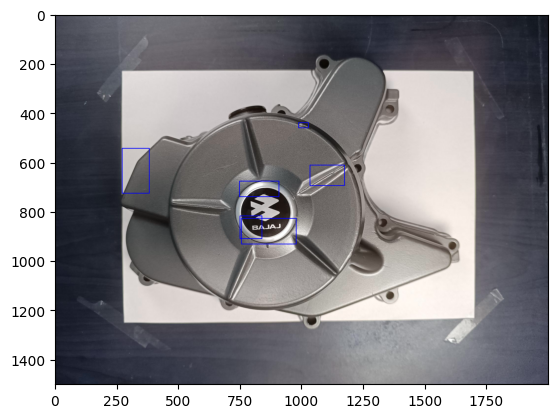

In [ ]:
im1 = ContourDrawing(result1, clear_img, damaged_img)